## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

## Homework 1
## Alexander Fabiano
## Applied Machine Learning

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
##plt.style.use("seaborn")
import seaborn as sns
import json
%matplotlib inline 
##this command eliminates the need to do plt.show() after each plot

### Comma Separated File (CSV)
**1. Read in CSV files**

The following data set is from the National Health and Nutrition Examination Survey, a subset of the CDC database.

In [64]:
nhanes = pd.read_csv("nhanes.csv")
nhanes.head()
##list(nhanes) ##lists only column names from dataframe

,seqn,gender,age,race,citizen,education,married,hsize,hincome,weight,height,bmi,waist,grip
0,73557,M,69,B,True,High School,4.0,3,4.0,78.3,171.3,26.7,100.0,55.2
1,73558,M,54,W,True,High School,1.0,4,7.0,89.5,176.8,28.6,107.6,61.5
2,73559,M,72,W,True,Some College,1.0,2,10.0,88.9,175.3,28.9,109.2,91.0
3,73560,M,9,W,True,NaN,NaN,4,9.0,32.2,137.3,17.1,61.0,32.2
4,73561,F,73,W,True,College,1.0,2,15.0,52.0,162.4,19.7,NaN,30.9


**2. Data Cleaning**

In [61]:
nhanes.married.unique()

array([  4.,   1.,  nan,   3.,   2.,   5.,   6.,  77.,  99.])

This data set was acquired second-hand and no documentation on the 'married' variable could be acquired, 
so it will not be used in any analysis. The variable *seqn* will also be dropped since it is merely an arbitrary index.

In [65]:
nhanes.drop(['married','seqn'], axis=1, inplace=True) ##axis=1 specifies a column

The variables *weight, height* and *waist* are all in terms of the metric system. For the sake of familiarity, they will be converted to our inferior native language, the standard system.

In [66]:
nhanes.weight = (nhanes.weight*2.20462).round(0) ## kg to pounds
nhanes.height = (nhanes.height/2.54).round(1) ## centimeters to inches
nhanes.waist = (nhanes.waist/2.54).round(1) ## centimeters to inches
nhanes.head()

,gender,age,race,citizen,education,hsize,hincome,weight,height,bmi,waist,grip
0,M,69,B,True,High School,3,4.0,173.0,67.4,26.7,39.4,55.2
1,M,54,W,True,High School,4,7.0,197.0,69.6,28.6,42.4,61.5
2,M,72,W,True,Some College,2,10.0,196.0,69.0,28.9,43.0,91.0
3,M,9,W,True,NaN,4,9.0,71.0,54.1,17.1,24.0,32.2
4,F,73,W,True,College,2,15.0,115.0,63.9,19.7,NaN,30.9


Number of null values by column:

In [7]:
nhanes.isnull().sum()

seqn            0
gender          0
age             0
race            0
citizen         4
education    4406
hsize           0
hincome       133
weight        452
height       1108
bmi          1120
waist        1514
grip         2498
dtype: int64

In [25]:
print('The total number of null values in the data set is: {}'.format(nhanes.isnull().values.ravel().sum()))

The total number of null values in the data set is: 11235


With this amount of null values, it is worth investigating the columns of interest with more than $10\%$ null values such as *education, height,* and *grip*. Although *waist* and *bmi* have greater than $10\%$ null values, they are mechanically related to height and weight, so they are not of great importance in this project.

In [18]:
nhanes.education.value_counts()

Some College    1770
College         1443
High School     1303
9-11             791
< 9              455
Do not know        5
Refused            2
Name: education, dtype: int64

Text(0.5,0,'Age')

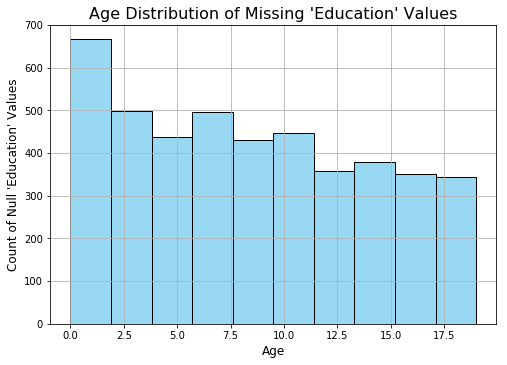

In [83]:
nhanes[nhanes['education'].isnull()]['age'].hist(bins = 10, color ="#99D8F2", edgecolor = "black", figsize = (8,5.5))
plt.title("Age Distribution of Missing 'Education' Values", fontsize=16)
plt.ylabel("Count of Null 'Education' Values", fontsize = 12)
plt.xlabel("Age", fontsize = 12)

The null values in *education* are concentrated for individuals under the age of 18. This clearly exhibits some sort of systematic error in the data; however, no intuitive explanation is apparent. In the analysis, any inferences regarding education for those under 18 are likely to be biased since over $30\%$ of the data are null in this category.

Text(0.5,0,'Age')

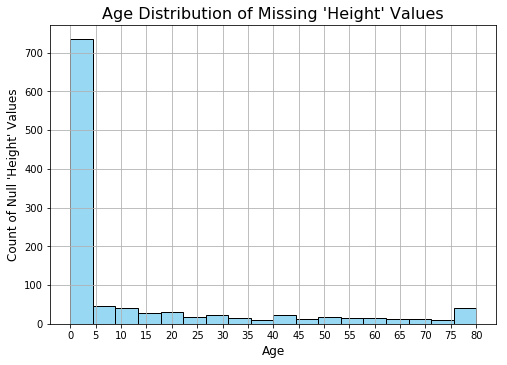

In [82]:
nhanes[nhanes['height'].isnull()]['age'].hist(bins = 18, color ="#99D8F2", edgecolor = "black", figsize = (8,5.5))
plt.xticks(np.arange(0,85,5))
plt.title("Age Distribution of Missing 'Height' Values", fontsize=16)
plt.ylabel("Count of Null 'Height' Values", fontsize = 12)
plt.xlabel("Age", fontsize = 12)
##nhanes[nhanes['height'].isnull()][['height','age']] ## shows ages where height = null

The above graph exhibits the number of null values in the "height" category by age brackets. Investigating this relationship shows that "height" null values occur systematically for infants and toddlers. This means that any analysis involving individuals below the age of 5 will have bias due to the disproportionate amount of missing values for this age bracket. 

Text(0.5,0,'Age')

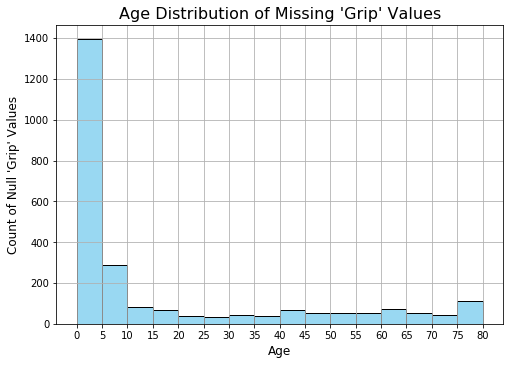

In [81]:
nhanes[nhanes['grip'].isnull()]['age'].hist(bins = 16, color ="#99D8F2", edgecolor = "black",figsize = (8,5.5))
plt.xticks(np.arange(0,85,5))
plt.title("Age Distribution of Missing 'Grip' Values", fontsize=16)
plt.ylabel("Count of Null 'Grip' Values", fontsize = 12)
plt.xlabel("Age", fontsize = 12)

Much like the *height* column, most of the *grip* missing values occur for infants, toddles, and small children under the age of eight. This is not disconcerting since grip strength is of little importance for most individuals in this age bracket.

**3. Data Description and Visualization**

In [12]:
nhanes.describe().round(2)

,seqn,age,hsize,hincome,weight,height,bmi,waist,grip
count,10175.00,10175.00,10175.00,10042.00,9723.00,9067.00,9055.00,8661.00,7677.00
mean,78644.00,31.48,3.87,10.88,138.01,5.11,25.68,34.36,63.05
std,2937.41,24.42,1.72,13.88,71.28,0.76,7.96,8.88,25.10
min,73557.00,0.00,1.00,1.00,6.83,2.61,12.10,15.83,8.00
25%,76100.50,10.00,2.00,5.00,83.67,4.90,19.70,28.03,45.60
50%,78644.00,26.00,4.00,8.00,143.96,5.31,24.70,34.57,60.30
75%,81187.50,52.00,5.00,14.00,184.09,5.61,30.20,40.47,80.70
max,83731.00,80.00,7.00,99.00,490.75,6.65,82.90,70.04,162.80


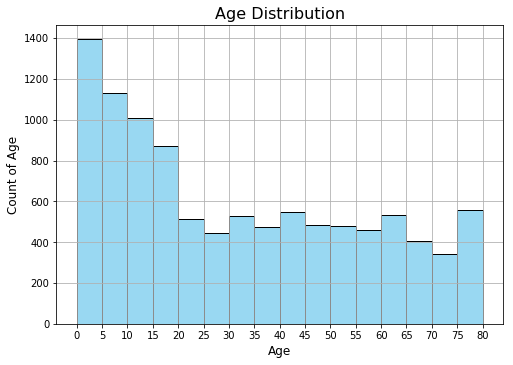

In [99]:
nhanes['age'].hist(bins = 16, color ="#99D8F2", edgecolor = "black", figsize = (8,5.5))
plt.xticks(np.arange(0,85,5))
plt.title("Age Distribution", fontsize=16)
plt.ylabel("Count of Age", fontsize = 12)
plt.xlabel("Age", fontsize = 12)
plt.show()

In [108]:
print("The mean age is: {}".format(round(nhanes.age.mean(),1)))

The mean age is: 31.5


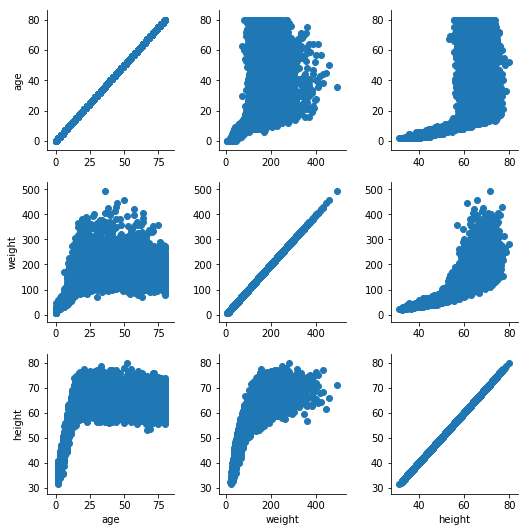

In [89]:
g = sns.PairGrid(nhanes[['age', 'weight', 'height']])
g.map(plt.scatter);

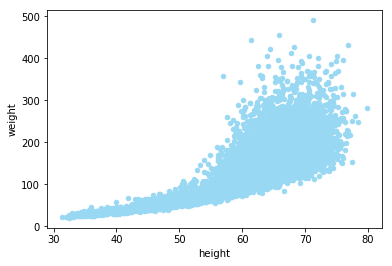

In [88]:
nhanes.plot.scatter(y='weight',x='height', color = '#99D8F2') ###light blue: 4F91F6
plt.show()

In [6]:
nhanes['race'].value_counts()

W    3674
H    2690
B    2267
O    1544
Name: race, dtype: int64

Text(0.5,1,'Race')

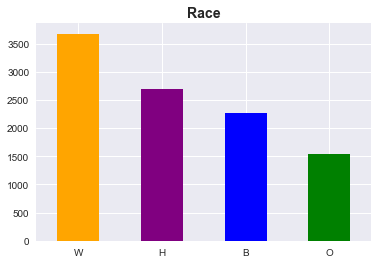

In [36]:
nhanes['race'].value_counts().plot(kind='bar', color=[['orange', 'purple', 'blue', 'green']], rot=0)
plt.title("Race", fontweight='bold', fontsize=14)
##plt.show()

In [7]:
nhanes['gender'].value_counts()

F    5172
M    5003
Name: gender, dtype: int64

In [119]:
nhanes.groupby('race')['gender'].value_counts()

race  gender
B     M         1152
      F         1115
H     F         1408
      M         1282
O     F          786
      M          758
W     F         1863
      M         1811
Name: gender, dtype: int64

### Tab-Separated Value File (TSV)
**1. Read in TSV**

The following data describes workplace fatalities by state for the year 2012 and was downloaded from Socrata.com as publicly available information.

In [127]:
work_fatal = pd.read_csv("Profile_of_Workplace_Safety_and_Health_in_the_United_States.tsv", sep = '\t', header = 0)

In [128]:
work_fatal.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,"South Carolina\n(33.99882060100049, -81.045367...",63,3.5,25,36200.0,3.0,492,49,24.0,111,State
1,"West Virginia\n(38.665511497000466, -80.712639...",49,6.9,46,19800.0,4.1,1798,27,7.0,173,Federal
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44,1.4,1,69700.0,3.1,1929,21,33.0,123,Federal
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101,3.8,30,65100.0,3.5,727,45,30.0,82,State
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97,6.1,42,39000.0,3.6,1872,24,19.0,131,Federal


**2. Data Cleaning**

The 'State' column has hidden text, which are actually state coordinates, following each observation. To remove the unwanted text, an anonymous function is used to parse the strings and then the 'map' function assigns the parsed strings to a new 'State' column. 

In [129]:
work_fatal['State'] = work_fatal['State'].map(lambda x: str(x).split('\n')[0])

The following is just a quick check to see if there is data for all 50 states:

In [120]:
len(work_fatal)

50

Here, we will examine the null values by column to see if any special cleaning or consideration is required.

In [121]:
work_fatal.isnull().sum()

State                                   0
Number of Fatalities, 2012              0
Rate of Fatalities, 2012                0
State Rank, Fatalities 2012             0
Number of Injuries/Illnesses 2012       8
Injuries/Illnesses 2012 Rate            8
Penalties FY 2013 (Average $)           0
Penalties FY 2013 (Rank)                0
Inspectors                              1
Years to Inspect Each Workplace Once    0
State or Federal Program                0
dtype: int64

Since the *Injuries/Illnesses* columns are colinear, there are essentially 9 null values in the entire data set. These null values occur in only 8 of the 50 rows, listed below. After examining the states where null values exist, no systematic error seems likely since the states are scattered throughout the continental U.S. and exhibit varied characteristics.

In [115]:
sum(work_fatal['Number of Injuries/Illnesses 2012'].isnull())
work_fatal[work_fatal['Number of Injuries/Illnesses 2012'].isnull()]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
11,Florida,218,2.7,15,NaN,NaN,1821,25,60.0,238,Federal
17,New Hampshire,14,2.2,4,NaN,NaN,2243,8,7.0,119,Federal
20,South Dakota,31,6.7,45,NaN,NaN,2346,7,NaN,521,Federal
33,Colorado,82,3.5,25,NaN,NaN,1649,31,28.0,122,Federal
38,Idaho,19,2.7,15,NaN,NaN,1449,33,9.0,108,Federal
41,Mississippi,63,5.5,40,NaN,NaN,1515,32,14.0,112,Federal
44,Rhode Island,8,1.7,2,NaN,NaN,2023,16,7.0,103,Federal
47,North Dakota,65,17.7,50,NaN,NaN,3045,3,8.0,111,Federal


*Note: Three null values were found in one column of the data; upon inspection the 3 rows were all blank, so they were ommitted*

In [144]:
work_fatal.dtypes

State                                    object
Number of Fatalities, 2012                int64
Rate of Fatalities, 2012                float64
State Rank, Fatalities 2012               int64
Number of Injuries/Illnesses 2012       float64
Injuries/Illnesses 2012 Rate            float64
Penalties FY 2013 (Average $)             int64
Penalties FY 2013 (Rank)                  int64
Inspectors                              float64
Years to Inspect Each Workplace Once      int64
State or Federal Program                 object
dtype: object

In [11]:
work_fatal.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,South Carolina,63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,West Virginia,49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,Massachusetts,44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,Tennessee,101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,Oklahoma,97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal


In [12]:
work_fatal.describe()

,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once
count,51.000000,51.000000,50.000000,42.000000,43.000000,50.000000,50.00000,49.000000,50.000000
mean,181.274510,4.300000,25.100000,64178.571429,3.620930,1727.880000,25.50000,38.979592,123.880000
std,641.619048,2.763548,14.733344,61912.808619,0.709983,963.377702,14.57738,38.594305,73.311647
min,8.000000,1.400000,1.000000,6500.000000,2.300000,363.000000,1.00000,5.000000,31.000000
25%,39.000000,2.600000,12.000000,26875.000000,3.150000,996.500000,13.25000,9.000000,85.000000
50%,70.000000,3.500000,25.000000,47250.000000,3.500000,1812.000000,25.50000,26.000000,111.500000
75%,114.500000,5.050000,37.750000,75625.000000,3.950000,2120.500000,37.75000,53.000000,134.000000
max,4628.000000,17.700000,50.000000,345400.000000,5.600000,6422.000000,50.00000,216.000000,521.000000


**3. Data Description and Visualization**

### STATA File (DTA)
**1. Read in DTA**

In [13]:
cps = pd.read_stata("cps_1999-2014.dta")
cps.head()

,year,serial,cpsid,ownershp,hhincome,proptax,pubhous,rentsub,foodstmp,stampno,...,faminc,pernum,cpsidp,wtsupp,wtfinl,relate,age,sex,race,marst
0,2014,1,2.013120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$75,000 - 99,999",1,2.013120e+13,NaN,2668.7604,Head/householder,76,Female,White,Divorced
1,2014,2,2.014020e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$75,000 - 99,999",1,2.014020e+13,NaN,2745.7466,Head/householder,65,Male,White,Never married/single
2,2014,3,2.014010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$100,000 - 149,999",1,2.014010e+13,NaN,3344.7320,Head/householder,78,Male,White,"Married, spouse present"
3,2014,3,2.014010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$100,000 - 149,999",2,2.014010e+13,NaN,3087.4410,Spouse,76,Female,White,"Married, spouse present"
4,2014,4,2.012120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Under $5,000",1,2.012120e+13,NaN,3061.8081,Head/householder,58,Male,Black/Negro,Never married/single


In [109]:
cps['cpsid'].value_counts()
len(cps.cpsid)

NameError: name 'cps' is not defined

In [15]:
list(cps)

['year',
 'serial',
 'cpsid',
 'ownershp',
 'hhincome',
 'proptax',
 'pubhous',
 'rentsub',
 'foodstmp',
 'stampno',
 'stampmo',
 'stampval',
 'atelunch',
 'lunchsub',
 'frelunch',
 'month',
 'faminc',
 'pernum',
 'cpsidp',
 'wtsupp',
 'wtfinl',
 'relate',
 'age',
 'sex',
 'race',
 'marst']

In [16]:
##cps['hhincome'] = cps['hhincom'].drop()
cps = cps.drop(cps[cps.hhincome < 0].index)

In [17]:
cps['hhincome'].describe()

count    5.838400e+05
mean     8.861104e+04
std      9.562835e+04
min      0.000000e+00
25%      3.486400e+04
50%      6.686000e+04
75%      1.136140e+05
max      2.289913e+06
Name: hhincome, dtype: float64

### Text File (TXT)
**1. Read in TXT**

In [41]:
cars = []
with open("car.data.txt", "r") as f:
    for line in f:
        tokens = line.split(",")
        cars.append(tokens)
cars[:10]

[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'big', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'big', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'big', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '4', 'small', 'low', 'unacc\n']]

buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high

In [42]:
headers = ['BuyPrice', 'MaintPrice', 'Doors', 'Persons', 'TrunkSize', 'Safety']
car = pd.read_csv('car.data.txt', header = None, names = headers)
car.head()

,BuyPrice,MaintPrice,Doors,Persons,TrunkSize,Safety
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc


### JavaScript Object Notation (JSON)
**1. Read in JSON**

In [ ]:
with open("CDC.json") as x:
    cdc = json.load(x)

In [ ]:
len(cdc)

In [ ]:
cdc.keys()

In [ ]:
cdc['meta']['view'].keys()

In [ ]:
cdc['meta']['view']['columns']

In [ ]:
[(x['fieldName'], x['position']) for x in cdc['meta']['view']['columns']]

In [ ]:
labels = ['yearstart',
 'yearend',
 'locationabbr',
 'locationdesc',
 'datasource',
 'topic',
 'question',
 'response',
 'datavalueunit',
 'datavaluetype',
 'datavalue', 
 'datavaluealt', 
 'datavaluefootnotesymbol', 
 'datavaluefootnote', 
 'lowconfidencelimit', 
 'highconfidencelimit']

In [ ]:
df = pd.DataFrame.from_records([x[8:24] for x in cdc['data']], columns = labels)

In [ ]:
df

In [ ]:
cdc['data']

In [ ]:
pd.read_json('CDC.json')